In [7]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go

In [8]:
usa = pd.read_excel('datasets_examples/usa.xlsx')
usa

,Unnamed: 0,date,country,confirmed,deaths
0,0,2020-01-22,united states of america,1,0
1,1,2020-01-23,united states of america,1,0
2,2,2020-01-24,united states of america,2,0
3,3,2020-01-25,united states of america,2,0
4,4,2020-01-26,united states of america,5,0
...,...,...,...,...,...
384,384,2021-02-09,united states of america,27192455,468227
385,385,2021-02-10,united states of america,27287159,471567
386,386,2021-02-11,united states of america,27392512,475444
387,387,2021-02-12,united states of america,27492023,480887


In [9]:
usa = usa.drop(columns=['Unnamed: 0'])

usa

,date,country,confirmed,deaths
0,2020-01-22,united states of america,1,0
1,2020-01-23,united states of america,1,0
2,2020-01-24,united states of america,2,0
3,2020-01-25,united states of america,2,0
4,2020-01-26,united states of america,5,0
...,...,...,...,...
384,2021-02-09,united states of america,27192455,468227
385,2021-02-10,united states of america,27287159,471567
386,2021-02-11,united states of america,27392512,475444
387,2021-02-12,united states of america,27492023,480887


In [10]:
usa = usa.rename(columns={'date': 'Date',
                         'country':'Country',
                         'confirmed':'Confirmed',
                         'deaths':'Deaths'})
usa.head(10)

,Date,Country,Confirmed,Deaths
0,2020-01-22,united states of america,1,0
1,2020-01-23,united states of america,1,0
2,2020-01-24,united states of america,2,0
3,2020-01-25,united states of america,2,0
4,2020-01-26,united states of america,5,0
5,2020-01-27,united states of america,5,0
6,2020-01-28,united states of america,5,0
7,2020-01-29,united states of america,6,0
8,2020-01-30,united states of america,6,0
9,2020-01-31,united states of america,8,0


In [11]:
fecha = pd.to_datetime(usa['Date'])
usa.loc[:,'Date']=fecha
usa.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Deaths                int64
dtype: object

In [12]:
usa1 = usa.resample('M',on='Date').max().reset_index(drop=True)
usa1['Confirmed Delta'] = ''
usa1['Deaths Delta'] = ''

for index,row in usa1.iterrows():
    if index == 0:
        usa1.loc[index,'Confirmed Delta'] = usa1.loc[index,'Confirmed']
        usa1.loc[index,'Deaths Delta'] = usa1.loc[index,'Deaths']
    else:
        usa1.loc[index,'Confirmed Delta'] = usa1.loc[index,'Confirmed'] - usa1.loc[index-1, 'Confirmed']
        usa1.loc[index,'Deaths Delta'] = usa1.loc[index,'Deaths'] - usa1.loc[index-1, 'Deaths']
usa1

,Date,Country,Confirmed,Deaths,Confirmed Delta,Deaths Delta
0,2020-01-31,united states of america,8,0,8,0
1,2020-02-29,united states of america,25,1,17,1
2,2020-03-31,united states of america,192301,5334,192276,5333
3,2020-04-30,united states of america,1081019,66135,888718,60801
4,2020-05-31,united states of america,1798713,107865,717694,41730
5,2020-06-30,united states of america,2642081,127879,843368,20014
6,2020-07-31,united states of america,4566931,154422,1924850,26543
7,2020-08-31,united states of america,6025593,183982,1458662,29560
8,2020-09-30,united states of america,7231832,207465,1206239,23483
9,2020-10-31,united states of america,9158771,231614,1926939,24149


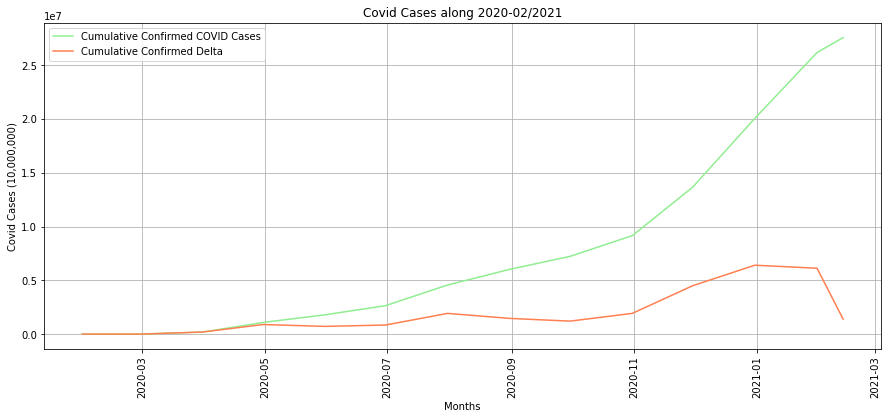

In [13]:
x_axis = usa1['Date']
c_axis = usa1['Confirmed']
cd_axis = usa1['Confirmed Delta']
plt.figure(figsize=(15,6))
plt.plot(x_axis, c_axis, color = 'lightgreen', label = 'Cumulative Confirmed COVID Cases')
plt.plot(x_axis, cd_axis, color = 'coral', label = 'Cumulative Confirmed Delta')
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Covid Cases (10,000,000)')
plt.title('Covid Cases along 2020-02/2021')
plt.legend()
plt.grid()
plt.show()

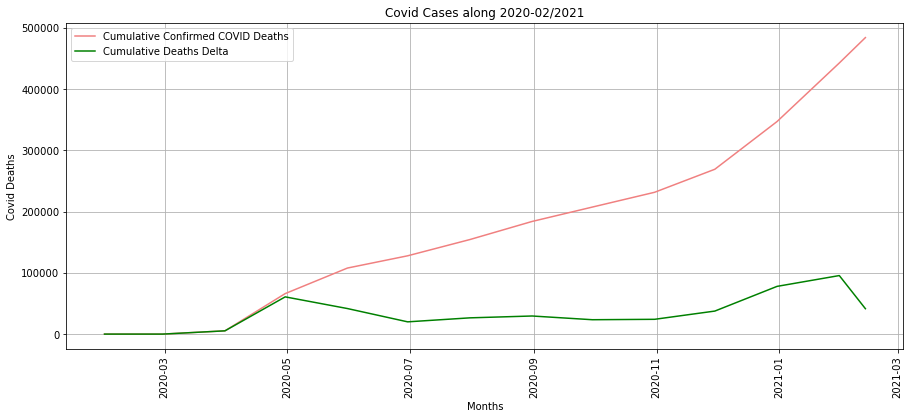

In [14]:
x_axis = usa1['Date']
d_axis = usa1['Deaths']
dd_axis = usa1['Deaths Delta']
plt.figure(figsize=(15,6))
plt.plot(x_axis, d_axis, color = 'lightcoral', label = 'Cumulative Confirmed COVID Deaths')
plt.plot(x_axis, dd_axis, color = 'green', label = 'Cumulative Deaths Delta')
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Covid Deaths')
plt.title('Covid Deaths along 2020-02/2021')
plt.legend()
plt.grid()
plt.show()

In [25]:
plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    'data': [go.Scatter(x = x_axis, y = d_axis)],
    'layout' : go.Layout(title = 'Covid Cases along 2020-02/2021')
})

plotly.offline.iplot({
    'data' : [go.Scatter(x = x_axis, y = dd_axis)],
    'layout' : go.Layout(title = 'Covid Cases along 2020-02/2021')
})

In [18]:
pd.options.plotting.backend = 'plotly'

g1 = usa1[]